# Imports

In [1]:
%matplotlib inline
from data import *
from plotting import *

Imported objects: ['re',
 'json',
 'pd',
 'np',
 'Path',
 'display',
 'logfile_register',
 'datasets',
 'criterion',
 'ascending',
 'option_names',
 'all_options',
 'available_models',
 'update_logfile_register',
 'parse_filenames',
 'load_logs',
 'filter_dataframe',
 'load_evaluation_results',
 'get_n_bests',
 'eval_result_summary_by_length']
Imported objects: ['plt',
 'sns',
 'pprint',
 'plot_comparison',
 'plot_training',
 'plot_eval_results_by_length',
 'plot_attention',
 'plot_attention_predictions',
 'plot_attention_grid',
 'plot_attention_w2v_vs_ctc']


# Pretraining

## Pretraining - unigram 1000

### Dataset o

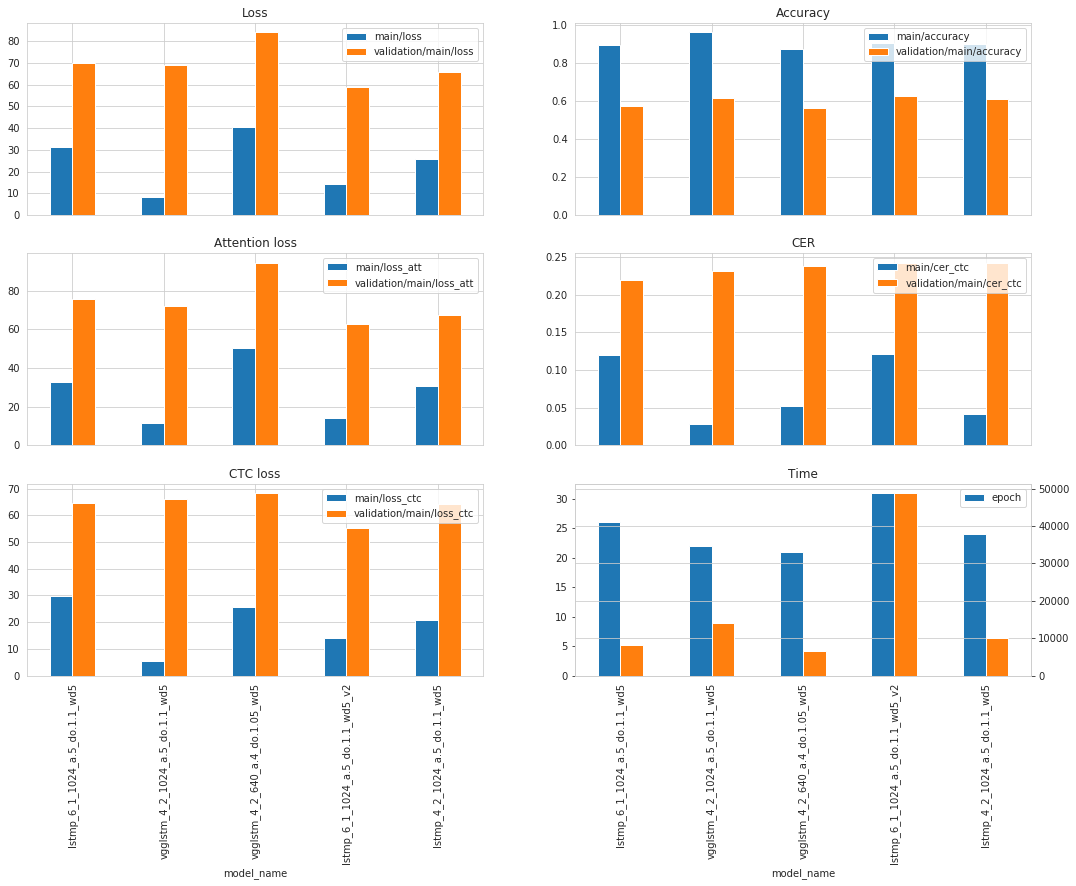

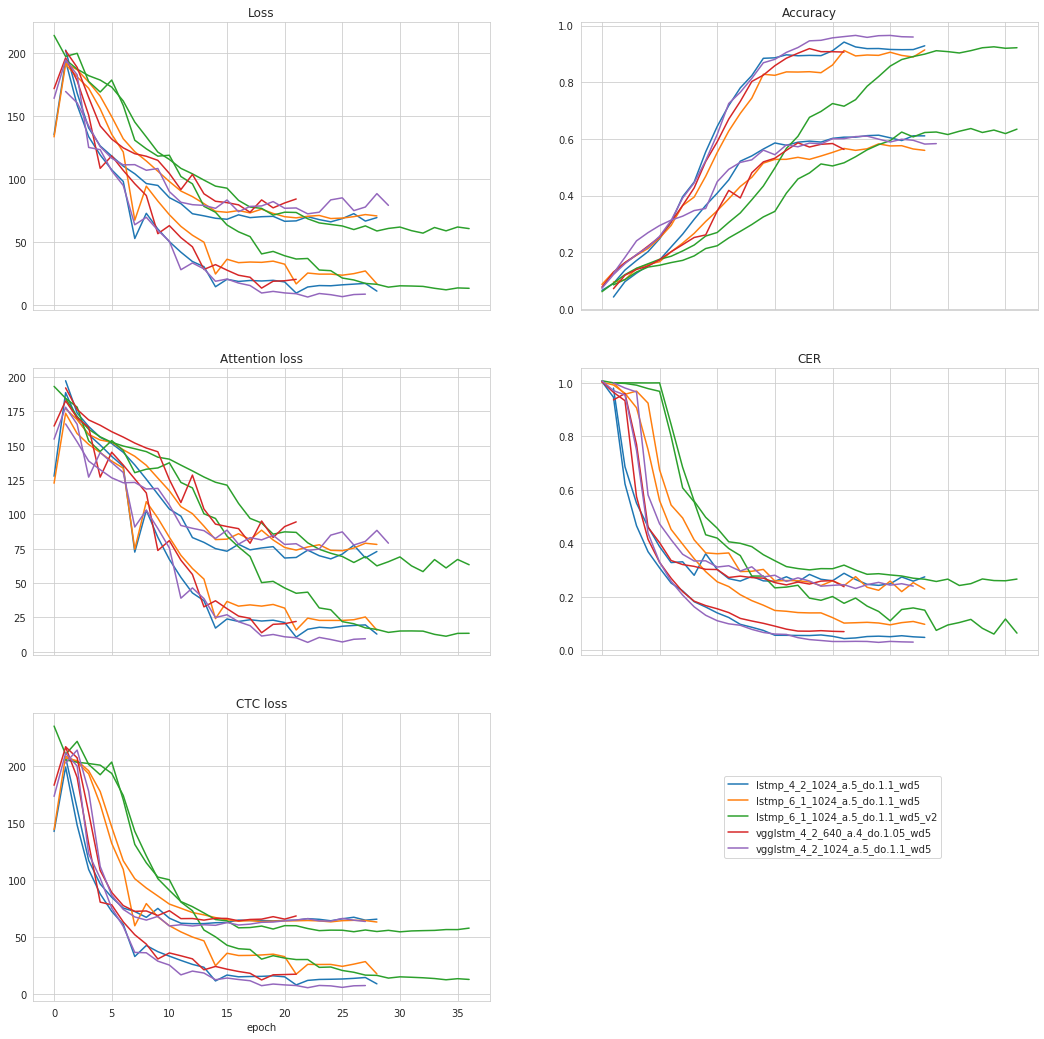

In [7]:
results = load_logs(filter_dataframe(available_models, exp_name="train_unigram_1000_o"))
top5 = get_n_bests(results[results["units"] != 1280], n=5).droplevel(0)

plot_comparison(top5)
# plt.tight_layout()
# plt.savefig("../exp/graphs/comp_unigram_1000_o.eps")

plot_training(results[results.model_name.isin(top5.index)])
# plt.tight_layout()
# plt.savefig("../exp/graphs/train_vgglstm_lg_unigram_1000_o.png", dpi=300)

### Dataset mono

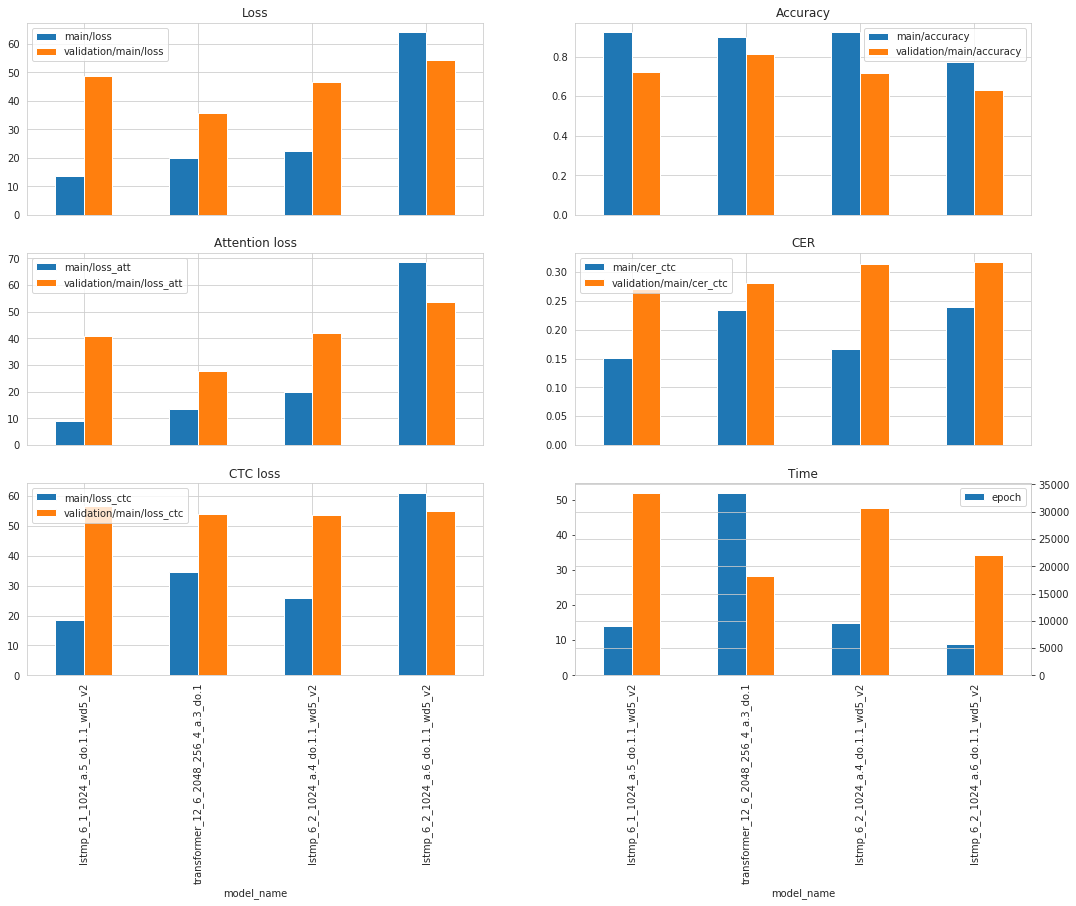

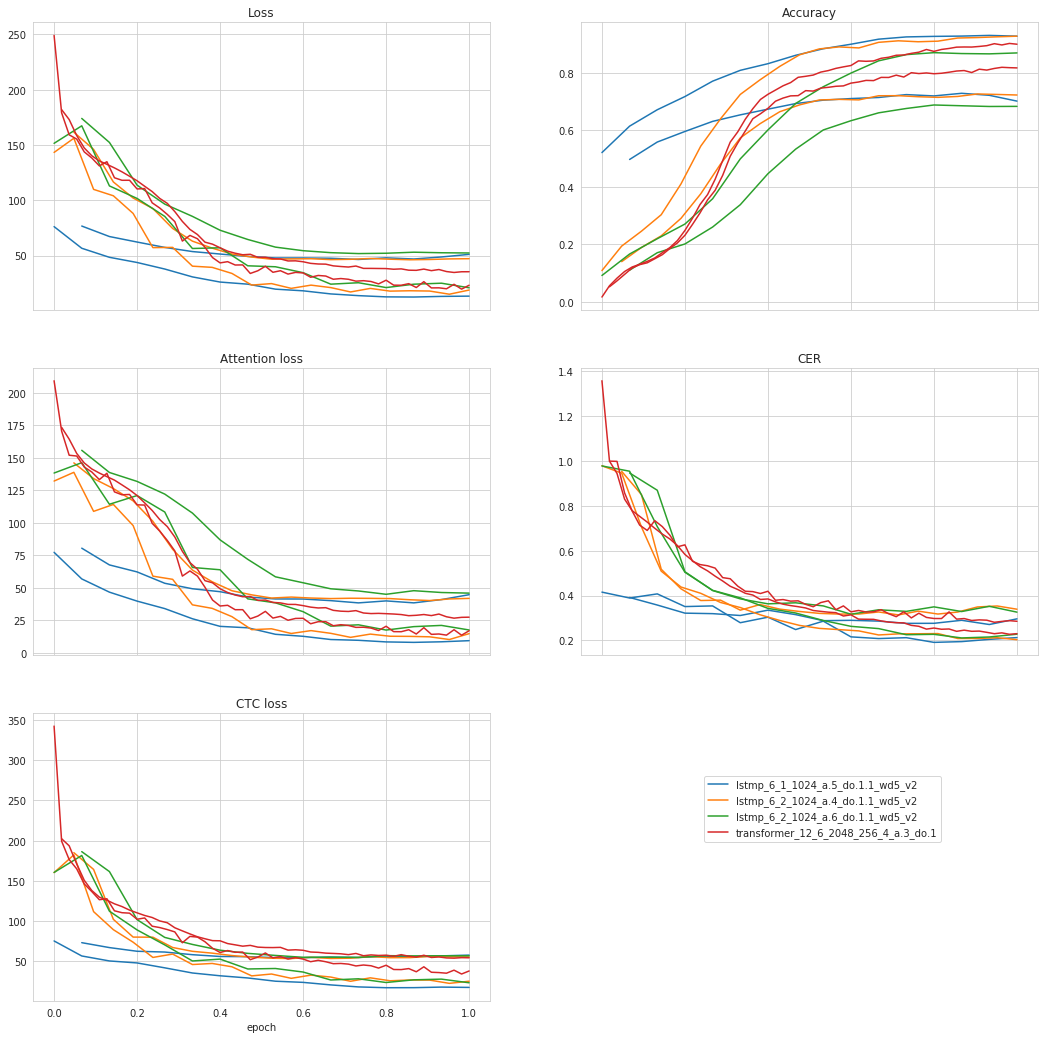

In [3]:
results = load_logs(filter_dataframe(available_models, exp_name="train_unigram_1000_mono"))
top4 = get_n_bests(results, n=4).droplevel(0)

plot_comparison(top4)
# plt.tight_layout()
# plt.savefig("../exp/graphs/comp_unigram_1000_o.eps")

plot_training(results[results.model_name.isin(top4.index)], relative=True)
# plt.tight_layout()
# plt.savefig("../exp/graphs/train_vgglstm_lg_unigram_1000_o.png", dpi=300)

In [ ]:
results = load_logs(filter_dataframe(available_models, exp_name="train_unigram_5000_mono"))
top4 = get_n_bests(results, n=4).droplevel(0)

plot_comparison(top4)
# plt.tight_layout()
# plt.savefig("../exp/graphs/comp_unigram_1000_o.eps")

plot_training(results[results.model_name.isin(top4.index)], relative=True)
# plt.tight_layout()
# plt.savefig("../exp/graphs/train_vgglstm_lg_unigram_1000_o.png", dpi=300)

### Evaluation train_unigram_1000_mono

#### Test scores

In [27]:
best_model_unigram_1000_mono = top4.iloc[0].path.parent
print(f"Best model: {best_model_unigram_1000_mono}")
eval_results = load_evaluation_results(best_model_unigram_1000_mono)
eval_results.groupby("test_split").mean()

Best model: ../exp/train_unigram_1000_mono/lstmp_6_1_1024_a.5_do.1.1_wd5_v2


,cer_ctc,cer_dec,ter_ctc,ter_dec
test_split,,,,
a,1.0800,0.7012,1.4232,0.9024
b,1.1103,0.6209,1.4513,0.7936
f,0.7882,0.4849,1.0107,0.6047
g,0.6322,0.5065,0.9208,0.6446
h,0.7933,0.5810,1.0767,0.7462
i,0.6340,0.4180,0.8048,0.4897
j,0.4404,0.3411,0.6113,0.4192
k,0.3786,0.2885,0.5341,0.3525
l,0.3700,0.3009,0.5305,0.3771


In [32]:
valid_uttids

0           V40001-fv400002.1
1           V40001-fv400002.2
2           V40001-fv400002.3
3           V40001-fv400002.4
4           V40001-fv400002.5
                 ...         
183109    V90605-fv901204.176
183110    V90605-fv901204.177
183111    V90605-fv901204.181
183112    V90605-fv901204.186
183113    V90605-fv901204.188
Name: uttid, Length: 183114, dtype: object

In [28]:
valid_uttids = pd.read_csv("../data/CGN_ALL/non_overlapping.txt", names=["uttid"], squeeze=True)
eval_results[eval_results.index.isin(valid_uttids)].groupby("test_split").mean()

,cer_ctc,cer_dec,ter_ctc,ter_dec
test_split,,,,
a,0.8105,0.6741,1.0683,0.8568
b,0.7671,0.5868,1.0502,0.7462
f,0.5952,0.4562,0.7904,0.5696
g,0.5089,0.4753,0.7300,0.5968
h,0.6347,0.5609,0.8760,0.7131
i,0.5174,0.3915,0.6672,0.4584
j,0.3870,0.3254,0.5444,0.4015
k,0.2987,0.2683,0.4316,0.3311
l,0.2916,0.2747,0.4439,0.3480


#### Impact of the sentence length on the test scores

In [21]:
(eval_result_summary_by_length(eval_results)
 [[("cer_ctc", "mean")]]
 .unstack(level=0).droplevel([0,1], axis=1)
 .style.background_gradient(cmap="Blues")
 .format("{:.2%}", na_rep="-"))

test_split,a,b,f,g,h,i,j,k,l,m,n,o
groundtruth,,,,,,,,,,,,
"(2.999, 4.0]",232.28%,329.33%,305.21%,154.80%,190.25%,158.26%,196.19%,238.99%,158.41%,18.27%,263.54%,105.25%
"(4.0, 6.0]",119.14%,138.45%,138.13%,123.97%,103.96%,94.85%,97.62%,69.83%,69.62%,92.31%,131.67%,40.67%
"(6.0, 8.0]",90.49%,87.36%,83.73%,72.21%,75.93%,70.36%,49.66%,35.52%,37.05%,45.75%,79.31%,17.97%
"(8.0, 9.0]",83.61%,76.11%,66.89%,57.05%,61.03%,55.07%,44.00%,39.43%,21.73%,28.22%,62.30%,17.76%
"(9.0, 11.0]",76.90%,70.77%,56.86%,53.92%,61.05%,54.99%,41.29%,30.75%,29.53%,21.64%,58.54%,15.91%
"(11.0, 13.0]",72.72%,59.53%,51.41%,48.92%,55.13%,48.82%,39.91%,24.85%,25.30%,12.50%,51.50%,14.49%
"(13.0, 15.0]",71.64%,58.64%,52.67%,48.04%,54.87%,46.52%,32.81%,27.72%,26.15%,24.51%,47.27%,15.37%
"(15.0, 19.0]",67.99%,52.12%,44.20%,48.97%,51.00%,37.45%,35.20%,27.73%,22.72%,26.78%,46.00%,15.45%
"(19.0, 25.0]",64.69%,49.89%,43.92%,36.19%,48.94%,37.84%,31.11%,24.20%,22.31%,27.14%,42.56%,15.73%


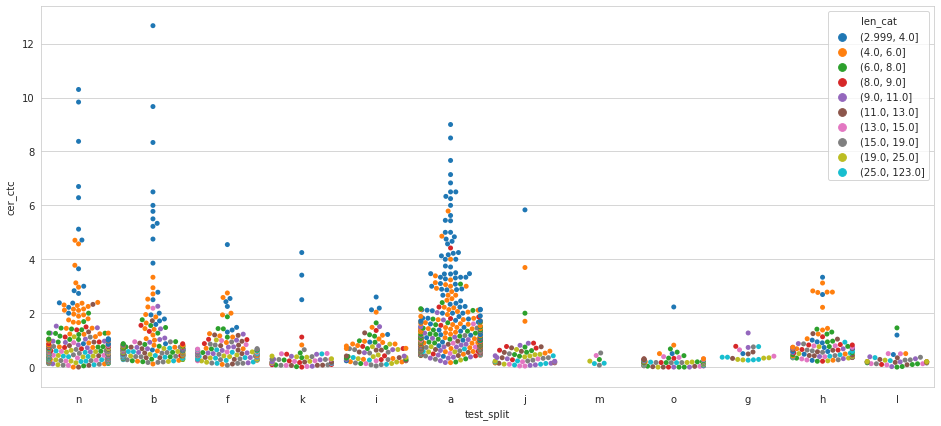

In [138]:
plot_eval_results_by_length(eval_results, "cer_ctc")

In [30]:
(eval_result_summary_by_length(eval_results[eval_results.index.isin(valid_uttids)])
 [[("cer_ctc", "mean")]]
 .unstack(level=0).droplevel([0,1], axis=1)
 .style.background_gradient(cmap="Blues")
 .format("{:.2%}", na_rep="-"))

test_split,a,b,f,g,h,i,j,k,l,m,n,o
groundtruth,,,,,,,,,,,,
"(2.999, 6.0]",118.94%,168.70%,182.02%,95.49%,101.32%,87.27%,96.26%,69.05%,77.02%,42.95%,127.34%,25.29%
"(6.0, 8.0]",81.44%,72.82%,68.89%,61.32%,67.44%,59.91%,46.58%,31.11%,27.04%,20.14%,63.78%,16.73%
"(8.0, 9.0]",78.43%,72.98%,60.24%,55.28%,55.77%,50.63%,41.85%,38.84%,21.73%,28.22%,55.03%,17.76%
"(9.0, 11.0]",73.80%,65.88%,52.55%,52.28%,58.38%,51.86%,40.07%,27.74%,27.77%,21.64%,53.02%,15.91%
"(11.0, 13.0]",71.46%,56.48%,49.47%,47.41%,53.99%,46.73%,37.13%,23.50%,25.30%,12.50%,48.83%,14.49%
"(13.0, 15.0]",71.00%,57.42%,51.91%,47.15%,53.86%,44.65%,32.81%,26.86%,24.93%,24.51%,44.67%,15.37%
"(15.0, 18.0]",67.62%,51.16%,42.29%,46.63%,49.53%,38.50%,35.62%,27.86%,22.67%,26.85%,45.35%,15.33%
"(18.0, 22.0]",65.34%,49.35%,44.82%,48.72%,49.44%,36.92%,29.81%,24.56%,22.26%,30.23%,43.71%,15.95%
"(22.0, 28.0]",61.77%,48.02%,40.16%,37.24%,48.38%,34.67%,26.87%,26.33%,23.36%,17.90%,40.04%,15.47%


#### Impact of alpha on the test score

In [28]:
model_dir = Path("../exp/train_unigram_1000_mono/lstmp_6_2_1024_a.6_do.1.1_wd5_v2")
eval_results = pd.concat([
    load_evaluation_results(model_dir).assign(alpha=re.search("a\.(\d)", model_dir.name).group(1))
    for model_dir in Path("../exp/train_unigram_1000_mono").glob("lstmp_6_2_1024_a.?_do.1.1_wd5_v2")
])

(eval_results
 .groupby(["alpha", "test_split"])
 .mean().unstack(1).T
 .style.highlight_min(axis=1)
 .format("{:.2%}", na_rep="-"))

#### Attention alignments

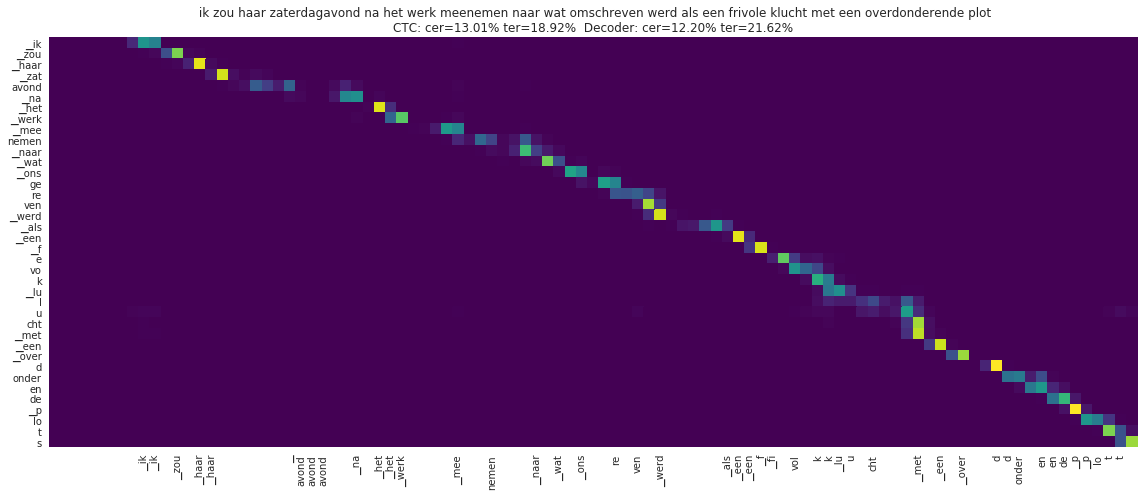

In [24]:
model_dir = Path("../exp/train_unigram_1000_mono/lstmp_6_2_1024_a.4_do.1.1_wd5_v2")
eval_results = load_evaluation_results(model_dir)

sample = eval_results.sort_values("cer_ctc").iloc[int(np.random.exponential(1000))]
attention_weights = model_dir / f"evaluate/{sample.test_split}/att_ws/{sample.name}.npy"

# fig, ax = plt.subplots(1, 1, figsize=(20,18))
plot_attention_predictions(attention_weights, sample);
ax.set_xticklabels(ax.get_xticklabels(), fontweight='light', fontsize=18)
ax.set_title(ax.get_title(), fontsize=22)
plt.tight_layout()
plt.savefig("../exp/graphs/ctc_vs_dec_pretrained.png", dpi=300)

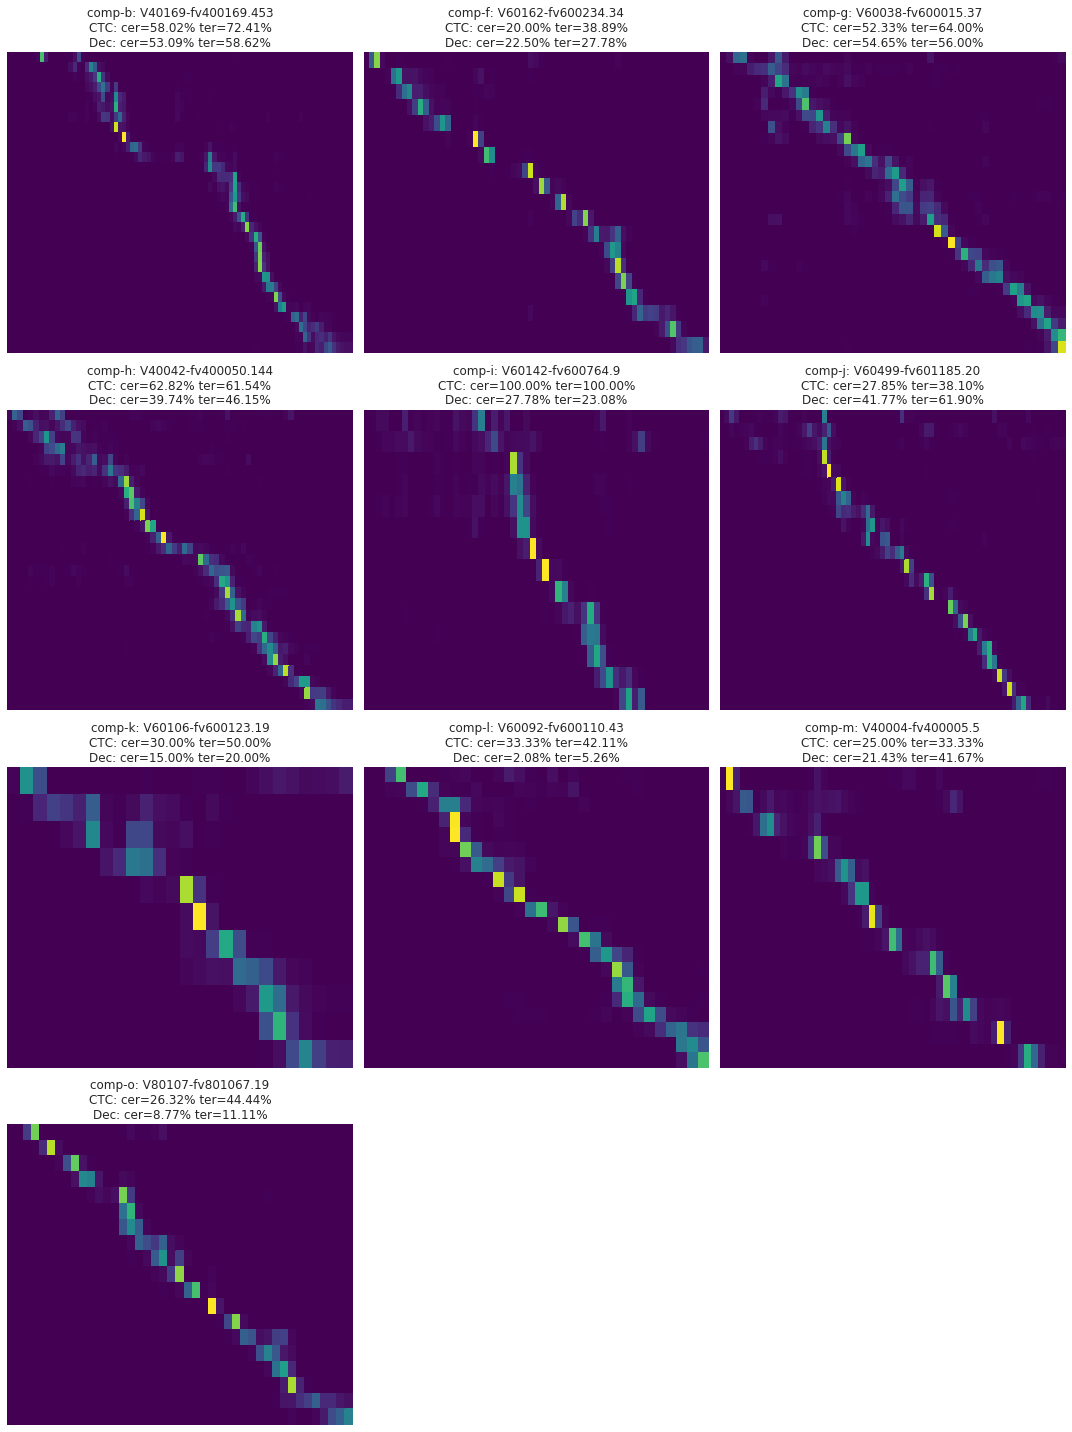

In [2]:
plot_attention_grid("../exp/train_unigram_1000_mono/lstmp_6_2_1024_a.4_do.1.1_wd5_v2")

## Pretraining - curriculum

o: 91 results
ok: 37 results
mono: 256 results
all: 348 results
Model was not evaluated?
Model was not evaluated?


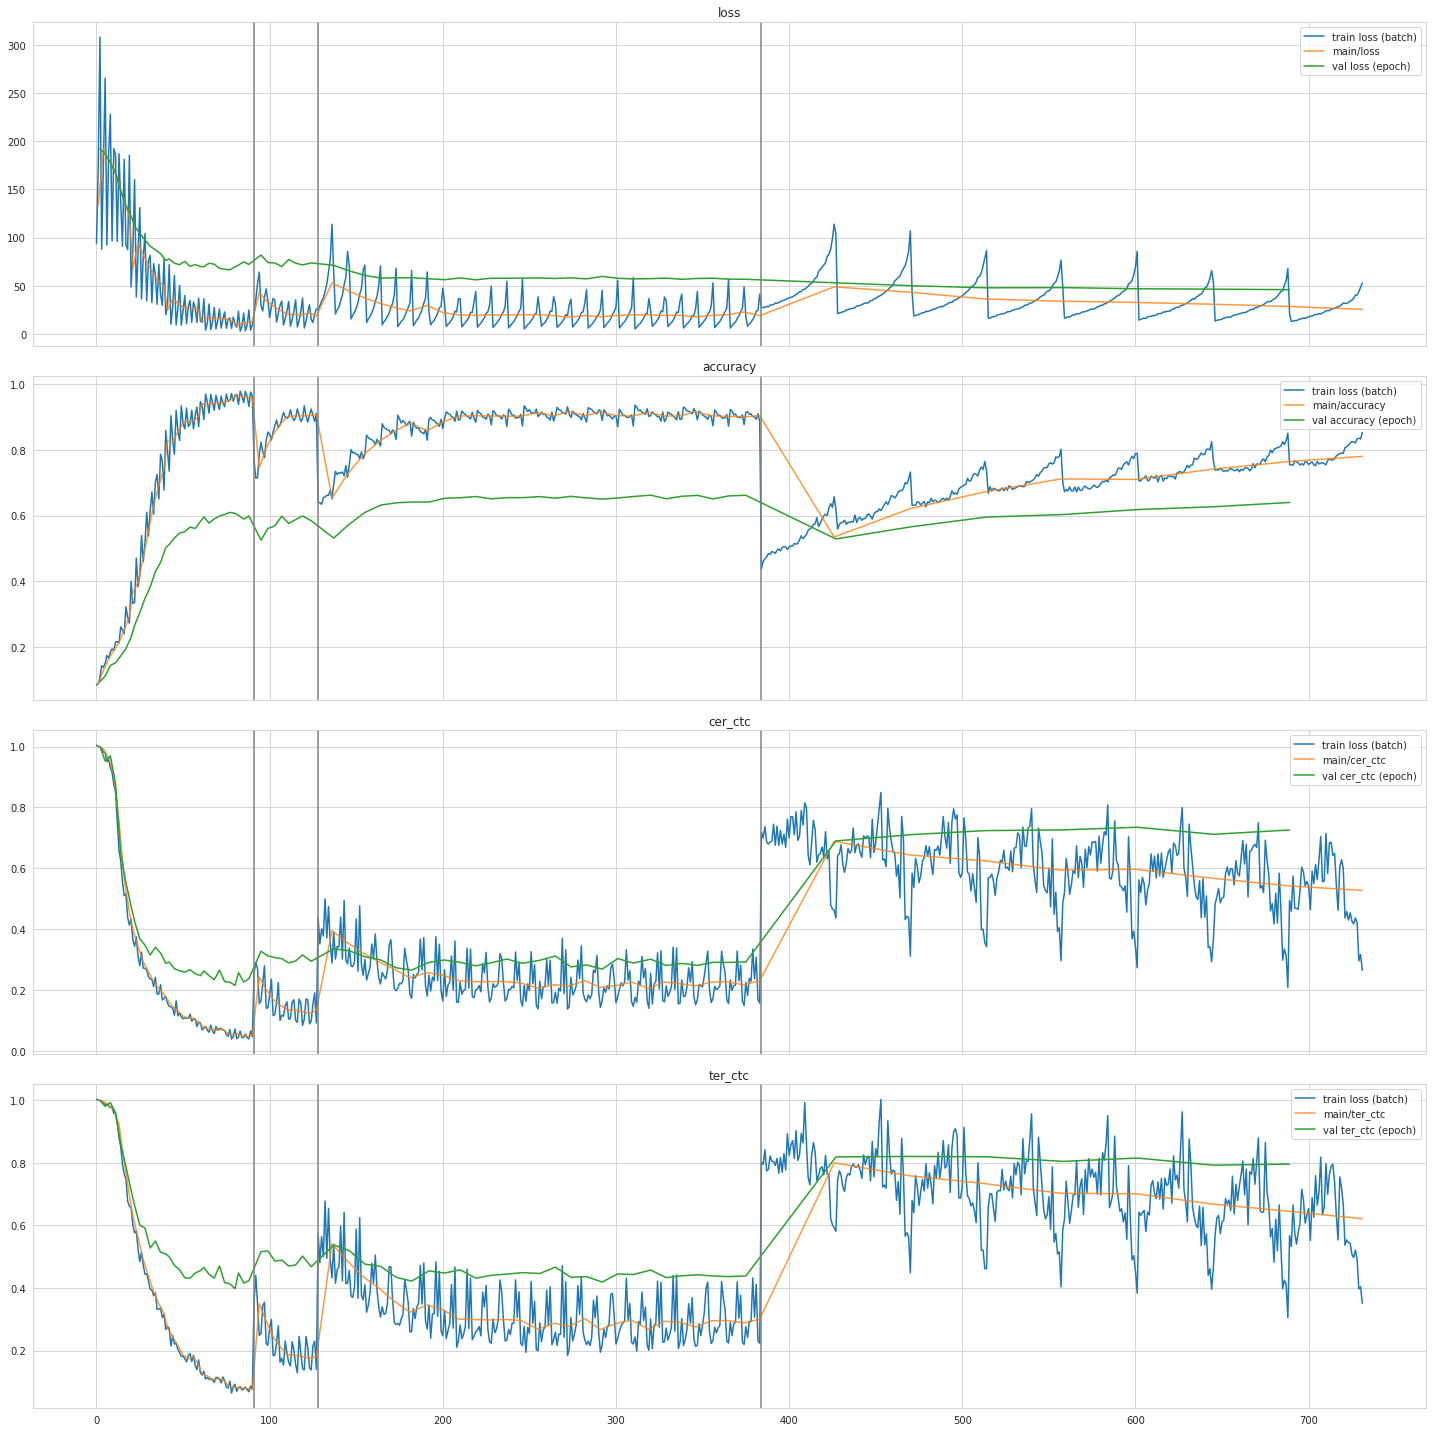

In [20]:
model_dir = "../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5"
nrows, ncols = 4, 1
_, axs = plt.subplots(nrows, ncols, figsize=(20,20), sharex=True)
summary = ModelSummary(model_dir, curriculum=True, evaluation=False)
for i, metric in enumerate(["loss", "accuracy", "cer_ctc", "ter_ctc"]):
    ax = axs[i // nrows, i % nrows] if (nrows > 1 and ncols > 1) else axs[i]
    summary.training_summary(metric=metric, ax=ax)
    ax.set_title(metric); ax.set_xlabel("")
plt.tight_layout()

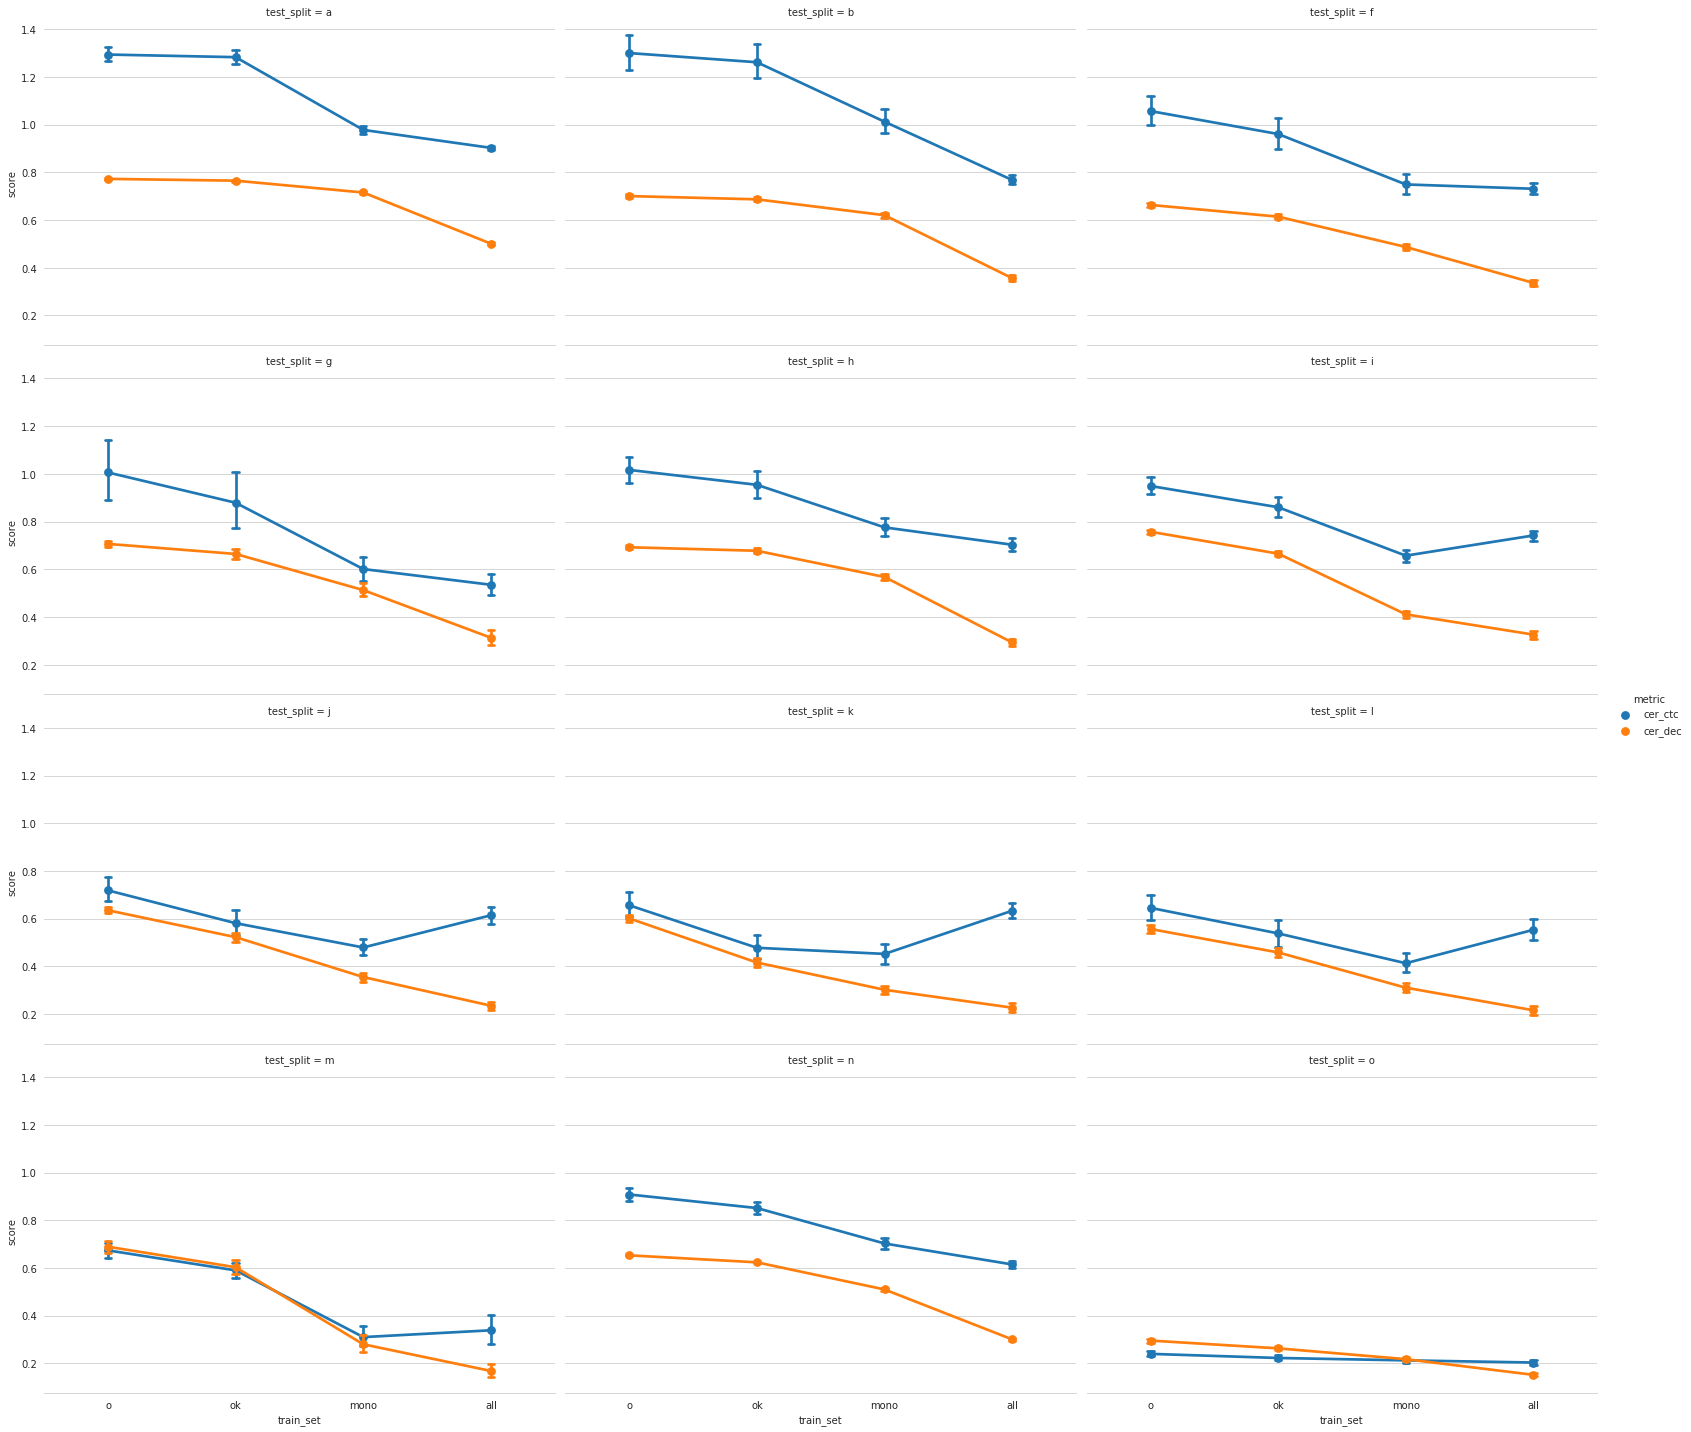

In [37]:
model_dir = "../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5"
eval_results = get_evaluation_results(model_dir)

metrics = ["cer_ctc", "cer_dec"]  #, "ter_ctc", "ter_dec"]
train_sets = ["o", "ok", "mono", "all"]
test_split = list("abfghijklmno")

# fig, axs = plt.subplots(4, 3, figsize=(20,20))
# for i, test_set in enumerate(eval_results.test_split.unique()):
#     sel = test_scores.loc[test_scores.test_split == test_set]
#     sns.boxplot(x="train_set", y="score", hue="metric", data=test_scores, ax=axs[i%3, i//3])
#     break

sns.catplot(x="train_set", y="score", hue="metric", col="test_split", data=(
    eval_results.assign(train_set=pd.Categorical(eval_results["train_set"], train_sets))
    .loc[(eval_results.train_set.isin(train_sets) & eval_results.test_split.isin(test_split)), 
         ["train_set", "test_split", *metrics]]
    .set_index(["train_set", "test_split"])
    .swaplevel(0, 1, axis=0)
    .stack(level=0)
    .reset_index()
    .rename(columns={"level_2": "metric", 0: "score"})
), col_wrap=3, kind="point", capsize=.05, aspect=1.5).despine(left=True);

# plt.savefig(f"{model_dir}/test_scores.png", dpi=800)

# (eval_results[["train_set", "test_split", *metrics]]
#  .assign(train_set=pd.Categorical(eval_results["train_set"], train_sets)))

In [35]:
test_scores = (eval_results[["train_set", "test_split", *metrics]]
               .assign(train_set=pd.Categorical(eval_results["train_set"], train_sets))
               .set_index(["train_set", "test_split"])
               .stack(0).rename("score")
               .reset_index()
               .rename(columns={"level_2": "metric"})
               .groupby(["train_set", "test_split", "metric"])
               .mean().unstack(level=1))

# test_scores.pivot(columns="metric", values="score", index=["train_set", "test_split"])
test_scores

score                                                   \
test_split             a      b      f      g      h      i      j      k   
train_set metric                                                            
o         cer_ctc 1.2935 1.2997 1.0566 1.0059 1.0167 0.9493 0.7185 0.6560   
          cer_dec 0.7724 0.7002 0.6631 0.7065 0.6925 0.7575 0.6351 0.6009   
          ter_ctc 1.8759 1.8774 1.5931 1.6144 1.6251 1.4928 1.1609 1.0410   
          ter_dec 1.0459 0.9816 0.9119 0.9740 0.9733 1.0205 0.8716 0.8136   
ok        cer_ctc 1.2825 1.2613 0.9603 0.8791 0.9542 0.8602 0.5810 0.4778   
          cer_dec 0.7648 0.6866 0.6140 0.6644 0.6778 0.6657 0.5224 0.4160   
          ter_ctc 1.7822 1.7437 1.3401 1.3252 1.4298 1.2308 0.8863 0.7220   
          ter_dec 1.0181 0.9425 0.8100 0.8717 0.9184 0.8764 0.6924 0.5410   
mono      cer_ctc 0.9777 1.0120 0.7490 0.6011 0.7758 0.6572 0.4792 0.4522   
          cer_dec 0.7153 0.6201 0.4869 0.5130 0.5679 0.4113 0.3552 0.3019   
          ter_ctc 1.2206 1.3295 0.9474 0.8227 1.0347 0.8074 0.6504 0.6121   
          ter_dec 0.9415 0.8352 0.6297 0.6757 0.7580 0.5021 0.4560 0.3862   
all       cer_ctc 0.9024 0.7677 0.7309 0.5353 0.7031 0.7419 0.6141 0.6331   
          cer_dec 0.5007 0.3561 0.3363 0.3133 0.2935 0.3264 0.2352 0.2269   
          ter_ctc 0.9466 0.8270 0.7970 0.6244 0.7803 0.8058 0.6856 0.7047   
          ter_dec 0.6098 0.4231 0.4139 0.3896 0.3681 0.3885 0.3008 0.2828   

                                               
test_split             l      m      n      o  
train_set metric                               
o         cer_ctc 0.6453 0.6737 0.9080 0.2400  
          cer_dec 0.5565 0.6890 0.6530 0.2957  
          ter_ctc 1.0441 0.9691 1.4014 0.4316  
          ter_dec 0.7711 0.9168 0.8985 0.4067  
ok        cer_ctc 0.5381 0.5899 0.8512 0.2227  
          cer_dec 0.4583 0.6030 0.6237 0.2631  
          ter_ctc 0.8308 0.8356 1.2548 0.3985  
          ter_dec 0.6203 0.8162 0.8400 0.3609  
mono      cer_ctc 0.4131 0.3102 0.7026 0.2127  
          cer_dec 0.3106 0.2801 0.5099 0.2178  
          ter_ctc 0.5770 0.4568 0.9493 0.3665  
          ter_dec 0.4131 0.3681 0.6741 0.3009  
all       cer_ctc 0.5533 0.3388 0.6149 0.2036  
          cer_dec 0.2160 0.1684 0.3007 0.1520  
          ter_ctc 0.6379 0.4363 0.7206 0.3283  
          ter_dec 0.2819 0.2190 0.3863 0.2135

# Training

## Warming up - mono

### Best results (all steps)

In [44]:
(
    load_logs(filter_dataframe(available_models, exp_name="train_word_vectors_mono"))
    .assign(task=lambda df: df["task"].str.replace("dec_only", "dec-only"))
    .groupby(["model_name", "task", "epoch"], as_index=False)
    .agg({metric: 'mean' for metric in ["main/loss", "validation/main/loss"]})
    .sort_values("validation/main/loss")
    .groupby(["model_name", "task"]).head(1).sort_values(["validation/main/loss"])
)

,model_name,task,epoch,main/loss,validation/main/loss
22,lstmp_6_1_1024_a.5_do.1.1_wd5,finetune_all,3,0.0409,0.0459
137,lstmp_6_1_1024_a.5_do.1.1_wd5_v2,retrain2,4,0.0485,0.0530
128,lstmp_6_1_1024_a.5_do.1.1_wd5_v2,retrain,4,0.0496,0.0533
258,lstmp_6_2_1024_a.5_do.1.1_wd5_v2,retrain,9,0.0501,0.0534
122,lstmp_6_1_1024_a.5_do.1.1_wd5_v2,dec-only,46,0.0495,0.0534
244,lstmp_6_2_1024_a.5_do.1.1_wd5_v2,dec-only_,35,0.0502,0.0536
204,lstmp_6_2_1024_a.5_do.1.1_wd5_v2,dec-only,39,0.0514,0.0542
14,lstmp_6_1_1024_a.5_do.1.1_wd5,dec-only,14,0.0560,0.0572
35,lstmp_6_1_1024_a.5_do.1.1_wd5,retrain,8,0.0565,0.0576
75,lstmp_6_1_1024_a.5_do.1.1_wd5,train,35,0.0577,0.0581


In [26]:
model_dir = "../exp/train_word_vectors_mono/lstmp_6_1_1024_a.5_do.1.1_wd5/finetune_all"
eval_results = load_evaluation_results(model_dir)
eval_results.groupby("test_split").mean()

,accuracy,loss,wer
test_split,,,
a,0.1694,0.0465,0.8271
b,0.3246,0.0383,0.6656
f,0.2654,0.0444,0.7273
g,0.2741,0.0456,0.7203
h,0.2913,0.0447,0.6999
i,0.2104,0.0487,0.7823
j,0.2984,0.0450,0.6947
k,0.2866,0.0510,0.7061
l,0.3345,0.0458,0.6574


### Compare pretrained model (decoder only) and model trained from scratch

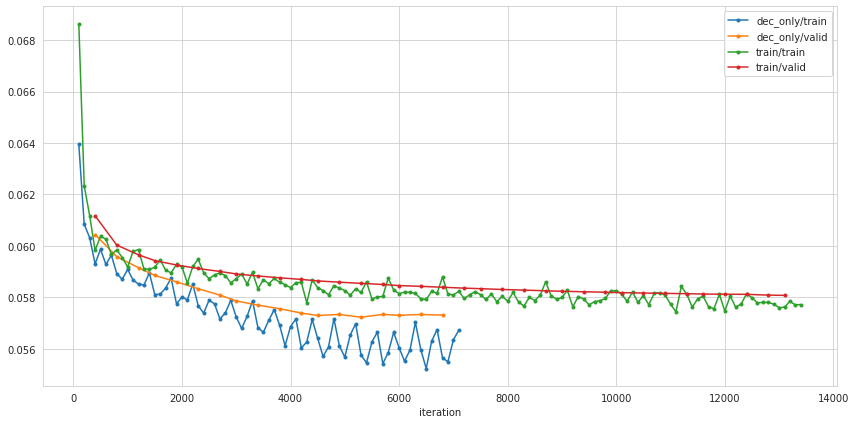

In [2]:
eval_results = load_logs(filter_dataframe(
    available_models, 
    exp_name="train_word_vectors_mono", 
    model_name="lstmp_6_1_1024_a.5_do.1.1_wd5"
).where(lambda df: df.task.isin(["train", "dec_only"])).dropna(how="all"))

fig, ax = plt.subplots(1, 1, figsize=(12,6))
for task, model_results in eval_results.groupby("task"):
    ykey = "main" if task == "train" else "decoder"
    model_results.plot(
        x="iteration", 
        y=f"main/loss", 
        ax=ax, marker='.',
        label=f"{task}/train"
    )
    
    model_results[model_results[f"validation/main/loss"].notnull()].plot(
        x="iteration", 
        y=f"validation/main/loss", 
        ax=ax, marker='.',
        label=f"{task}/valid"
    )

plt.tight_layout()
plt.savefig("../exp/graphs/training_dec_only.png", dpi=300)

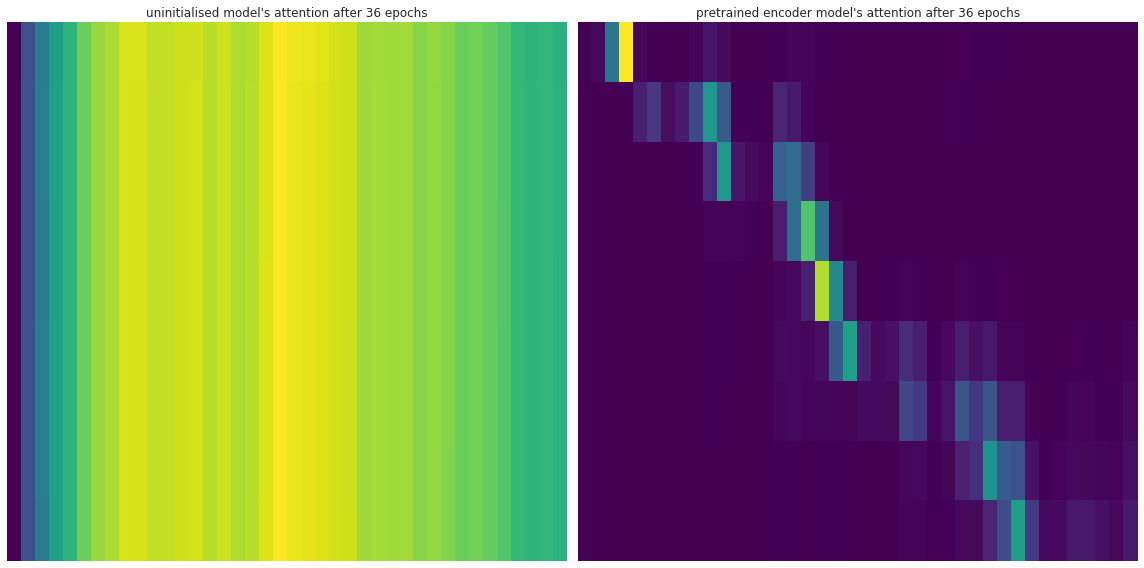

In [158]:
# finetuned_model = "../exp/train_word_vectors_mono/lstmp_6_1_1024_a.5_do.1.1_wd5/finetune_all"
model_names = ["uninitialised model", "pretrained encoder model"] #, "pretrained enc+dec model"
models = [pretrained_model, retrained_model] #finetuned_model
fig, axs = plt.subplots(1, 2, figsize=(16,8))
for i, (epoch, model, model_name, ax) in enumerate(zip([36, 36], models, model_names, axs)):
    att = np.load(Path(model, f"results/att_ws/V40001-fv400002.12.ep.{epoch}.npy"))[:,:40]
    sns.heatmap(att, cbar=False, xticklabels=[], yticklabels=[], cmap="viridis", ax=ax)
    ax.set_title(f"{model_name}'s attention after {epoch} epochs")
    
plt.tight_layout()
plt.savefig("../exp/graphs/hyp_pretrain_word_vectors_att.png", dpi=300)

### Results

In [6]:
trained_decoder_dir = Path("../exp/train_word_vectors_mono/lstmp_6_1_1024_a.5_do.1.1_wd5_v2/dec-only")
pretrained_model = load_evaluation_results("../exp/train_unigram_1000_mono/lstmp_6_1_1024_a.5_do.1.1_wd5_v2") #.set_index("id")
trained_decoder = load_evaluation_results(trained_decoder_dir)
dump_dir = trained_decoder_dir/f"evaluate/o/results/dump"
uttid = np.load(dump_dir/"uttids.0001.npy")[-1]
attention_weights = np.load(dump_dir/"attn_ws.0001.npy")[-1]
sample = trained_decoder.loc[uttid]
# sample = trained_decoder.sort_values("wer").iloc[int(np.random.exponential(2.))]
# attention_weights = trained_decoder_dir/f"evaluate/{sample.test_split}/results/dump"
# plot_attention_predictions()
# plot_attention(attention_weights);
display(trained_decoder.groupby("test_split").mean().sort_index())
# eval_result_summary_by_length(trained_decoder)

,accuracy,loss,wer
test_split,,,
a,0.0223,0.0553,0.9774
b,0.0505,0.0517,0.9471
f,0.0691,0.0524,0.9274
g,0.0606,0.0550,0.9381
h,0.0422,0.0555,0.9567
i,0.0558,0.0543,0.9423
j,0.1023,0.0523,0.8934
k,0.1209,0.0574,0.8753
l,0.1385,0.0533,0.8562


### Attention alignments CTC vs Decoder-only model

In [40]:
sample

cer_ctc                                                    0.8000
cer_dec                                                       NaN
ctc_raw_pred    [<blank>, <blank>, <blank>, <blank>, <blank>, ...
ctc_sent         in groot-britanni<unk> raast de epidemie onve...
dec_raw_pred    [in, beeldekes, cvp-meerderheid, overloperij, ...
dec_sent                                            inror is niet
groundtruth      d'r zijn nu al zeshonderd zeventien haarden v...
ter_ctc                                                    0.9643
ter_dec                                                    1.0000
test_split                                                      k
Name: V60458-fv601017.2, dtype: object

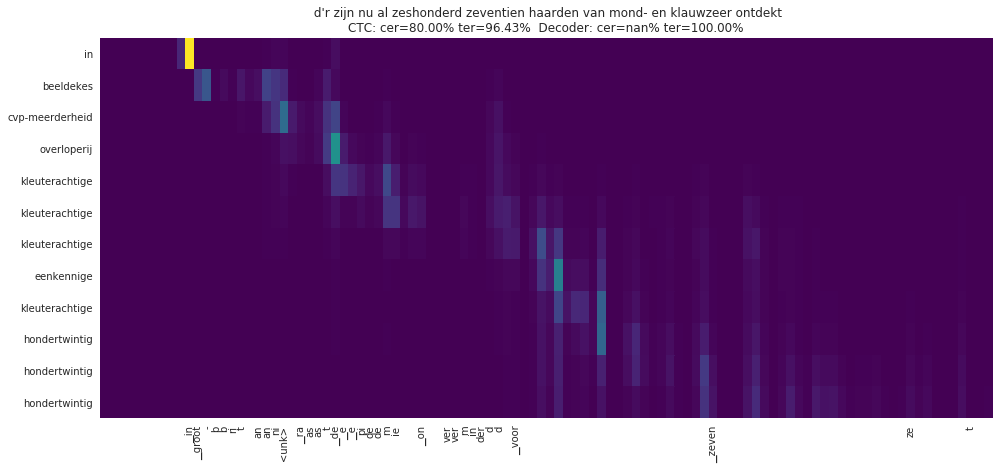

In [31]:
attention_weights, sample, dec_results = plot_attention_w2v_vs_ctc(
    "../exp/train_unigram_1000_mono/lstmp_6_1_1024_a.5_do.1.1_wd5_v2",
    "../exp/train_word_vectors_mono/lstmp_6_1_1024_a.5_do.1.1_wd5_v2/dec-only",
#     list("ijklmno"),
    prob_scale=1,
#     uttid="V40149-fv400417.57"
    uttid="V60458-fv601017.2"
)

# display(sample.to_frame())
# display(dec_results)
plt.savefig("../exp/graphs/att_vs_ctc_dec_only.png", dpi=300)

## Fine-tuning

In [20]:
model_dir = "../exp/train_word_vectors_all/lstmp_6_1_1024_a.5_do.1.1_wd5/retrain"
eval_results = load_evaluation_results(model_dir)
eval_results.groupby("test_split").mean()
# print(eval_results.groupby("test_split").mean().to_latex())

,accuracy,loss,wer
test_split,,,
a,0.1687,0.0460,0.8279
b,0.3273,0.0377,0.6648
f,0.2575,0.0440,0.7363
g,0.2644,0.0456,0.7293
h,0.2854,0.0442,0.7081
i,0.1974,0.0490,0.7958
j,0.2955,0.0450,0.6988
k,0.2678,0.0517,0.7230
l,0.3304,0.0459,0.6631


In [ ]:
eval_results[eval_results.index.isin(valid_uttids)].groupby("test_split").mean()

### Predictions

component a
eigenlijk is een beroeps is dat uhm
ja gewillen een gedragskaart is dat

component b
denk je dat een leerkracht z'n taal werkelijk moet moet aanpassen aan die leerlingen of niet
wel gewillen misschiem misschiem boemvol meetste vluchtigs als gedragskaart denk risicootje dat verkwansel vluchtigs lurkende vluchtigs

component f
dit is geen bedrij bedrijfsbezoek natuurlijk hé
doemme is misschiem cultuurfreak natuurlijk tegenslaan nee

component g
dat alles te veel vanuit instellingen daarmee bedoel ik rusthuizen en dergelijke bekeek
dat alles te veel van diepergaand vluchtigs gewillen gewillen lodderogen ethiopiers onderhoudssubsidie hetzelfs

component h
we keren terug naar de achttiende eeuw voor christus
waarschij deurwacht lurkende beliefden aso-leerlingen toptwintig deftigere wauwelde wauwelde

component i
eerste kilometer is bijna afgelegd
eerste toptwintig is boemvol vuilnismand

component j
op de eerste dag van het proces in pretoria wordt de zitting uitgesteld
op de ee

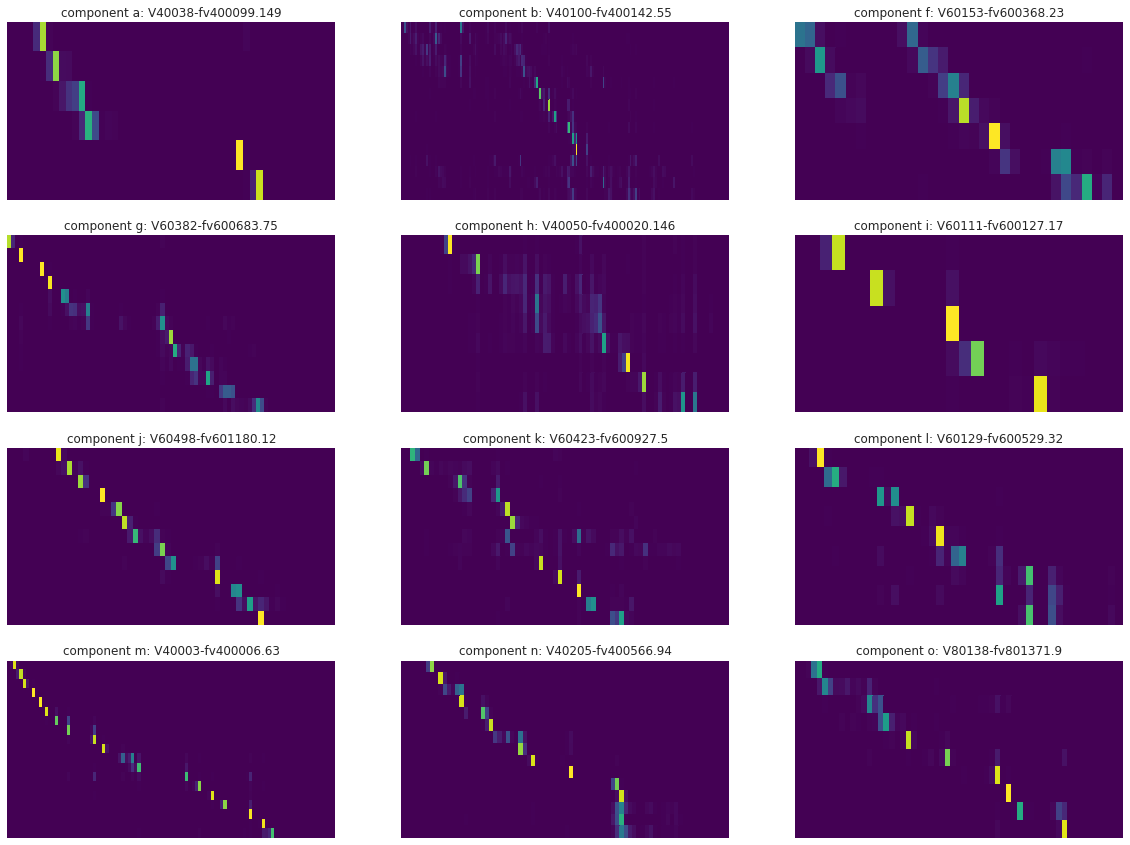

In [263]:
batch_index = 12
annots = pd.read_csv("../data/CGN_ALL/annotations.csv", index_col="uttid")
fig, axs = plt.subplots(4, 3, figsize=(20,15))
for i, dump_dir in enumerate(sorted(Path(f"{model_dir}/evaluate").glob("?/"))):
    att_file, = np.random.choice(list(dump_dir.glob("results/dump/attn_ws.*.npy")), 1)
    uttid = np.load(str(att_file).replace("attn_ws", "uttids"))[batch_index]
    prediction_str = eval_results.loc[uttid, "prediction_str"]
    sentence = annots.loc[uttid].text
    ylen = len(prediction_str.split())
    att = np.load(att_file)[batch_index, :ylen, :]    
    ax = axs[i // 3, i % 3]
    sns.heatmap(att, cbar=False, xticklabels=[], yticklabels=[], cmap="viridis", ax=ax)
    ax.set_title(f"component {dump_dir.name}: {uttid}")
    print(f"component {dump_dir.name}")
    print(f"{sentence}")
    print(f"{prediction_str}")
    print()

# plt.tight_layout()
# plt.savefig("../exp/graphs/attentions_test_word_vectors_mono_lstmp_6_1_1024_a.5_do.1.1_wd5.png", dpi=300)

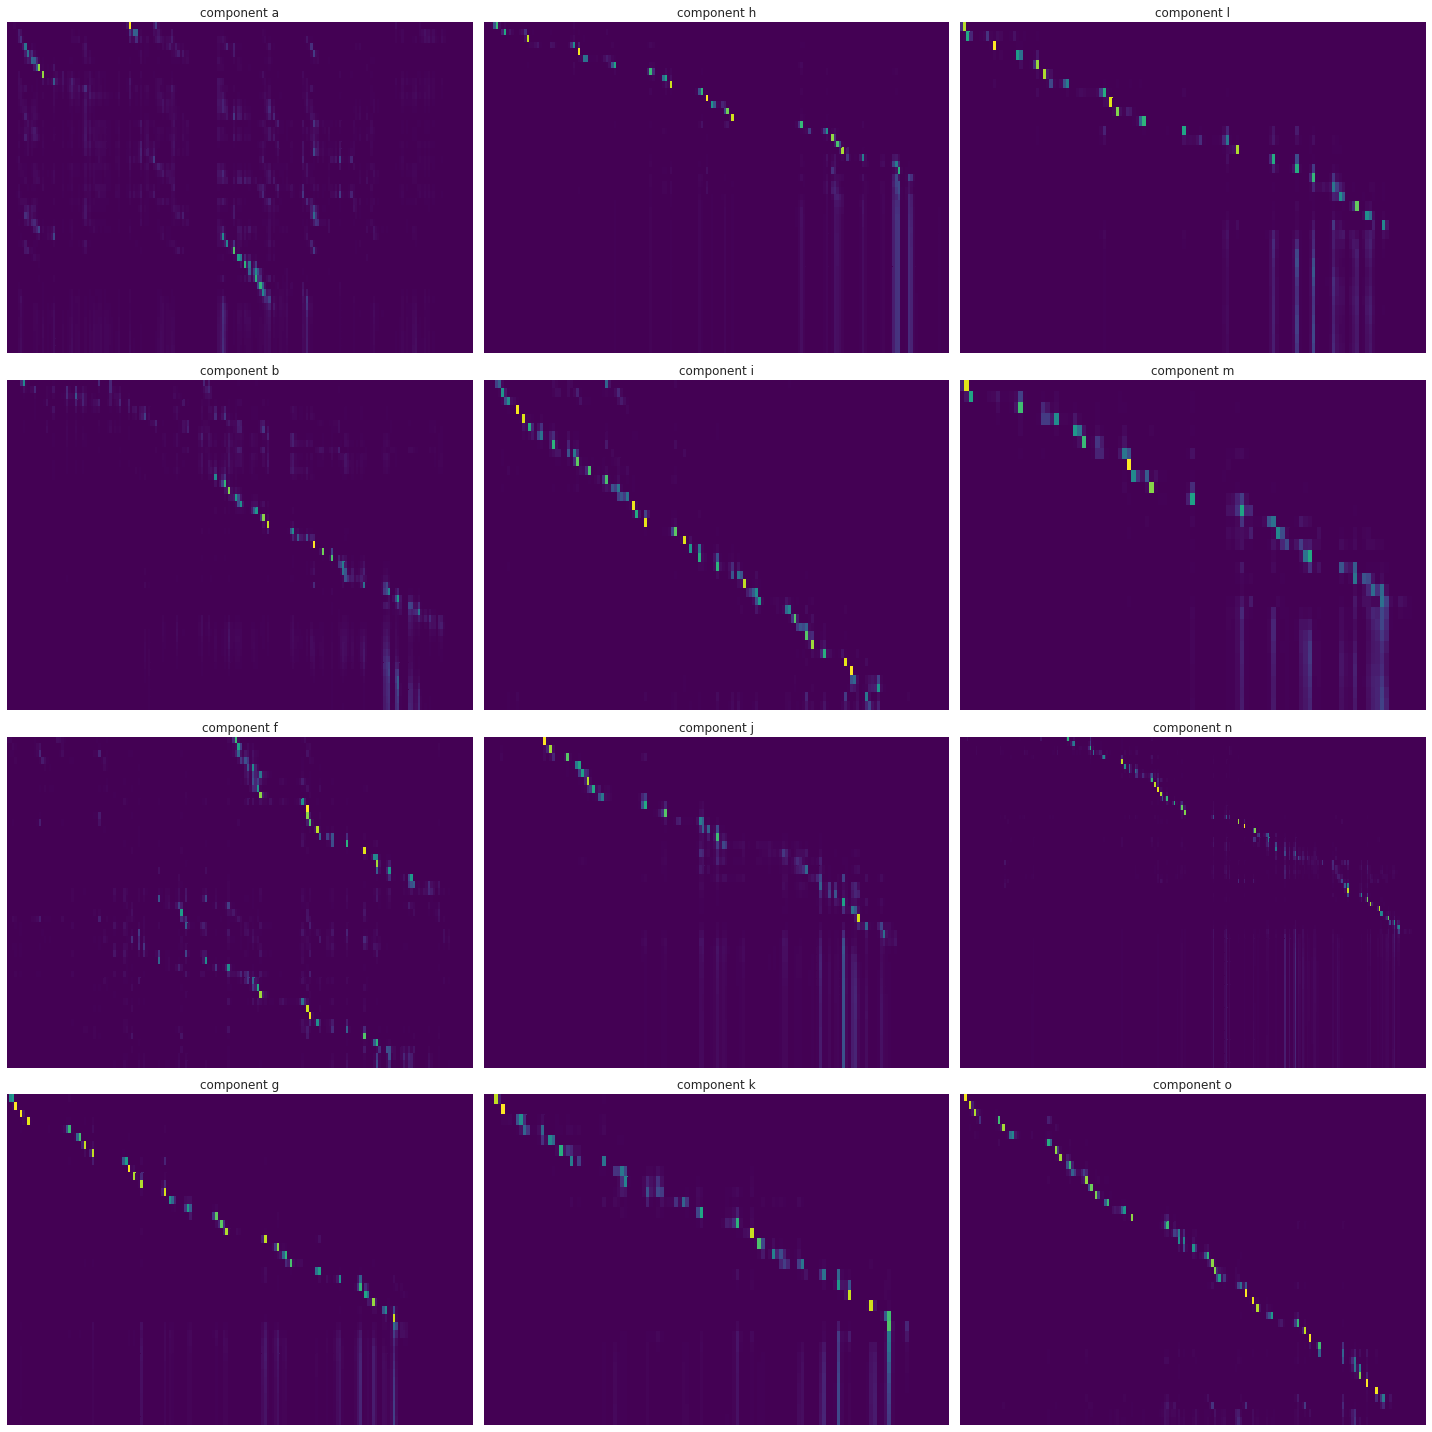

In [219]:
fig, axs = plt.subplots(4, 3, figsize=(20,20))
model = "../exp/train_word_vectors_all/lstmp_6_1_1024_a.5_do.1.1_wd5/retrain/evaluate"
for i, subset in enumerate(sorted(Path(model).glob("?"))):
    attn_ws = np.load(Path(subset, "results/dump/attn_ws.0001.npy"))[5]
    ax = axs[i % 4, i // 4]
    sns.heatmap(attn_ws, xticklabels=False, yticklabels=False, cbar=False, cmap="viridis", ax=ax)
    ax.set_title(f"component {subset.name}")
plt.tight_layout()

# Datasets

## Word distribution per dataset

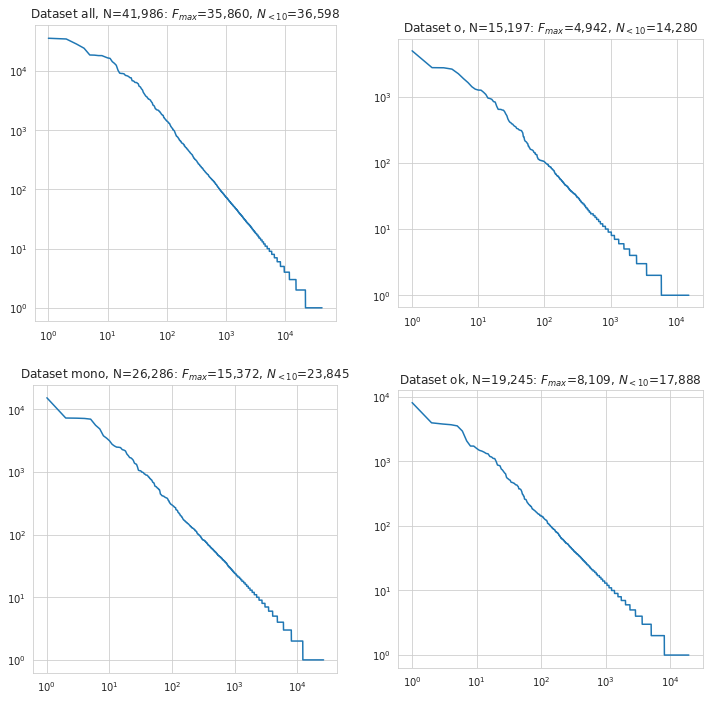

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
for i, wc in enumerate(Path("~/Downloads").expanduser().glob("word_dist.*")):
    tag = wc.suffix.replace(".", "")
    ar = np.loadtxt(wc)[:, 0]
    ar.sort()
    ax = axs[i % 2, i // 2]
    ax.loglog(np.arange(1, len(ar) + 1), ar[::-1])
    ax.set_title(f"Dataset {tag}, N={len(ar):,}: $F_{{max}}$={ar[-1]:,.0f}, $N_{{<10}}$={(ar < 10).sum():,.0f}")
    ax.set_aspect("equal")

plt.savefig("../exp/graphs/zipf_datasets.eps")

## Annotations

Many (~11 %) of the annotations have the wrong timing specified in the annotations which leads to faulty utterances

In [25]:
annot = pd.read_csv("../data/CGN_ALL/annotations.csv", index_col="uttid")

print(
    "Total dataset: {:.2%}".format(
        annot.groupby(["name", "start", "end"]).count().where(lambda df: df["comp"] > 1).dropna().shape[0] / len(annot)
    )
)

for comp, group in annot.groupby("comp"):
    overlapping = (
        group.groupby(["name", "start", "end"])
        .count()
        .where(lambda df: df["comp"] > 1).dropna()
    ).shape[0] / len(group)
    
    print(comp, f"{overlapping:.2%}")

Total dataset: 11.25%
comp-a 17.54%
comp-b 11.77%
comp-c 11.44%
comp-d 10.83%
comp-f 9.26%
comp-g 4.02%
comp-h 10.82%
comp-i 8.92%
comp-j 3.76%
comp-k 3.36%
comp-l 3.21%
comp-m 1.96%
comp-n 7.06%
comp-o 0.89%


In [39]:
annot = pd.read_csv("../data/CGN_ALL/annotations.csv")
annot.loc[~annot.uttid.isin(valid_uttids)].to_csv("../data/CGN_ALL/problematic_utts.csv", index=False)

In [41]:
valid_uttids = (
    annot.assign(nrows=1)[["name", "start", "end", "nrows"]]
    .groupby(["name", "start", "end"])
    .transform(len).where(lambda df: df.nrows == 1).dropna()
).index
np.savetxt("../data/CGN_ALL/non_overlapping.txt", valid_uttids, fmt='%s')

# Backup

## Small models (Apr 2020)

### vanilla

- started: 04/17 12:19:17
- config: conf/train_ep1000_es5.yaml
- batch size: 64
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: none

o: 91 results
ok: 37 results
mono: 256 results
all: 960 results
Model was not evaluated?
Model was not evaluated?


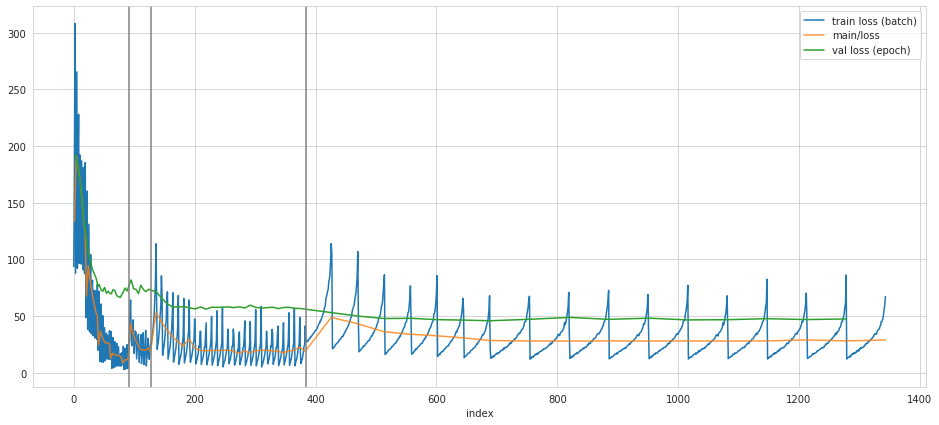

In [15]:
summary = ModelSummary("../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5")
summary.training_summary()

In [16]:
summary.evaluation_summary()

### fast

- started: 04/21 09:12:04
- config: conf/train_ep1000_es5_fast.yaml
- batch size: 256
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: none

Model was not evaluated?
Model was not evaluated?


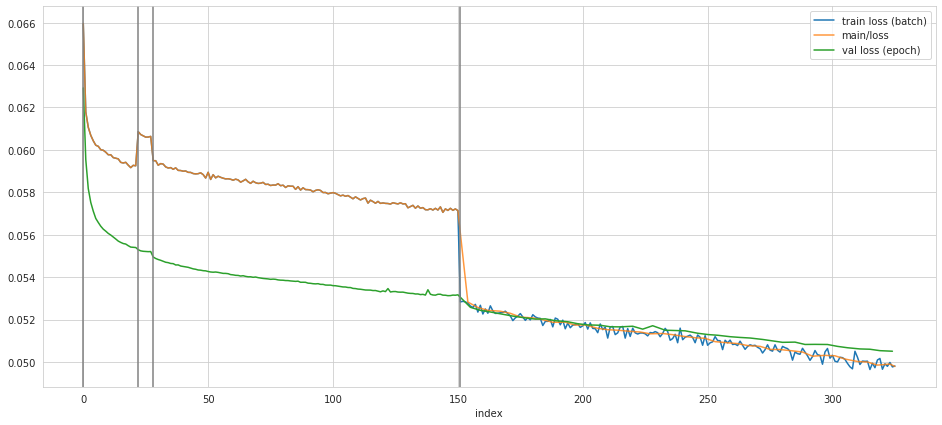

In [6]:
summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/v2")
summary.training_summary()

### sorted

- started: 04/20 11:55:42
- config: conf/train_ep1000_es5_sorted.yaml
- batch size: 128
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: -1
- preprocess: none

In [40]:
# summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/sorted")
# summary.training_summary()

,accuracy,wer,loss
dataset,,,
a,0.0908,0.9084,0.0491
b,0.1555,0.8412,0.0440
f,0.1172,0.8803,0.0494
g,0.1262,0.8732,0.0517
h,0.1161,0.8819,0.0508
i,0.0814,0.9169,0.0541
j,0.1395,0.8583,0.0515
k,0.1376,0.8615,0.0584
l,0.1502,0.8477,0.0534


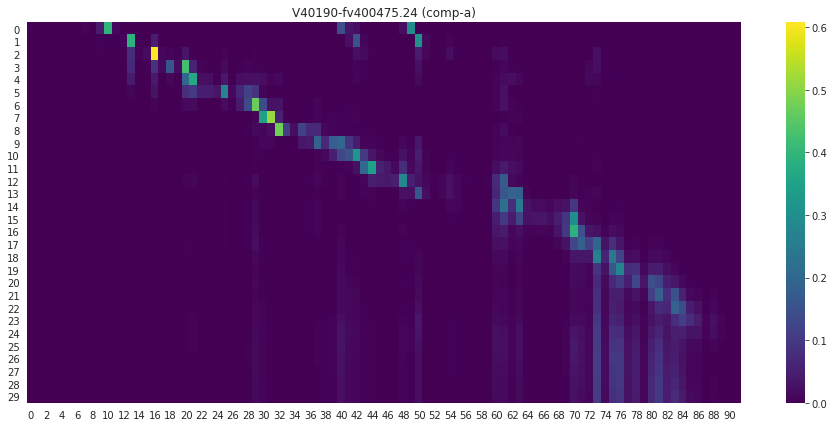

In [8]:
summary.evaluation_summary()

### SpecAugment

- started: 04/21 09:12:04
- config: conf/train_ep1000_es5_sorted.yaml
- batch size: 128
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: conf/specaug.yaml

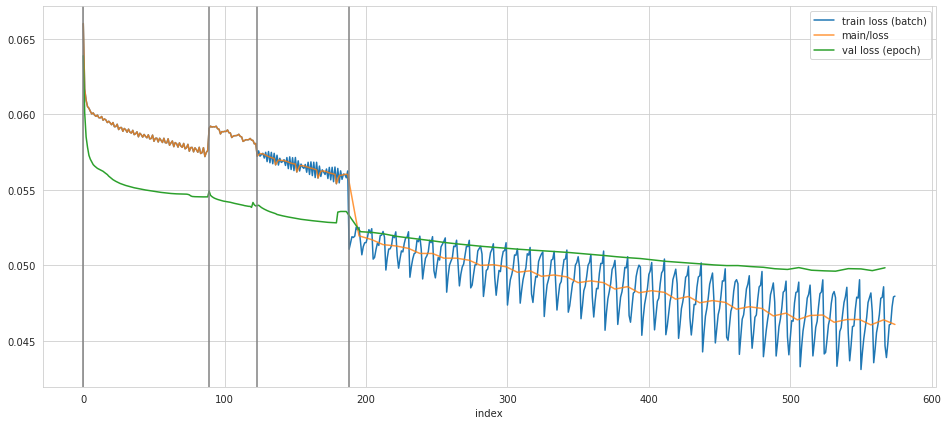

In [9]:
summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/specaug")
summary.training_summary()

,accuracy,wer,loss
dataset,,,
a,0.0837,0.9155,0.0492
b,0.1464,0.8506,0.0443
f,0.1025,0.8949,0.0498
g,0.1165,0.8832,0.0520
h,0.1033,0.8951,0.0512
i,0.0737,0.9258,0.0545
j,0.1251,0.8729,0.0520
k,0.1242,0.8742,0.0589
l,0.1354,0.8627,0.0538


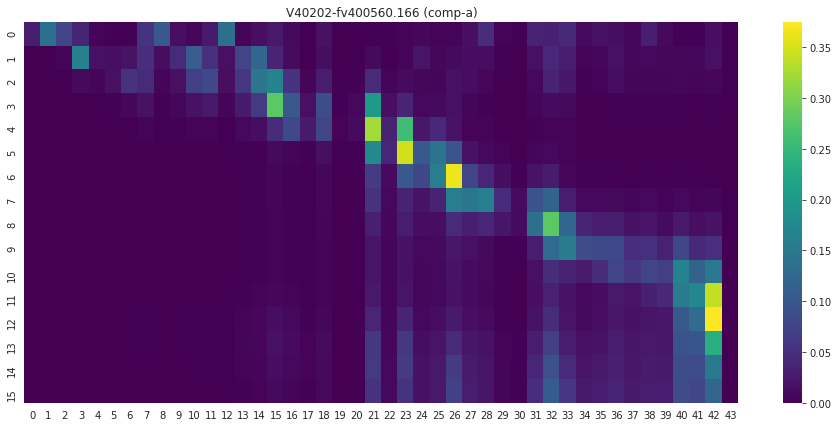

In [9]:
summary.evaluation_summary()

## Evaluation

In [186]:
def load_batch(batch_nr):
    result_dir = Path(model_dir, "evaluate", "results")
    output_files = list(result_dir.glob("*.npy"))
    
    attn_weights = np.load(list(filter(lambda p: p.stem == f"att_weights_batch{i}", output_files))[0])
    ids = np.load(list(filter(lambda p: p.stem == f"id_batch{i}", output_files))[0])
    targets = np.load(list(filter(lambda p: p.stem == f"target_batch{i}", output_files))[0])
    target_lengths = np.load(list(filter(lambda p: p.stem == f"target_lengths{i}", output_files))[0])
    preds = np.load(list(filter(lambda p: p.stem == f"predictions_batch{i}", output_files))[0])

    return {
        "attention": attn_weights,
        "uttids": ids,
        "targets": targets,
        "target_lengths": target_lengths,
        "predictions": preds
    }

def score(y_pred, y_true, ylen):
    return ((y_pred[:ylen] - y_true[:ylen]) ** 2).mean()

def batch_scores(batch):
    return np.array([score(
        batch["predictions"][i], 
        batch["targets"][i],
        batch["target_lengths"][i]
    ) for i in range(len(batch["predictions"]))])


In [1]:
# with open("../dump/CGN_test/deltafalse/data_words.all.json") as f:
#     test_set = json.load(f)["utts"]
    
# batch = load_batch(0)

In [2]:
# batch_scores(batch)

In [3]:
# batch["targets"][-1].shape, batch["predictions"][-1].shape

In [4]:
# i = -1
# sns.heatmap(batch["attention"][i][:batch["target_lengths"][i]], cmap="Blues");

In [190]:
def Embedding(num_embeddings, embedding_dim, eos_idx, eos_value=0):
    m = nn.Embedding(num_embeddings, embedding_dim)
    nn.init.uniform_(m.weight, -0.1, 0.1)
    nn.init.constant_(m.weight[eos_idx], eos_value)
    return m


def load_pretrained_embedding_from_file(embed_path, vocab, freeze=True, eos_idx=-1, eos_value=0):
    vocab = vocab.copy()
    num_embeddings = len(vocab)
    # eos_idx MUST be -1 (= the last one) otherwise, we will have a clash with the other indices
    # Note: can be easily solved in load_embedding, but does not matter a.t.m.
    assert eos_idx == -1 or eos_idx == num_embeddings - 1
    embed_dict = parse_embedding(embed_path)
    embed_dim = embed_dict[list(embed_dict)[0]].size(0)
    embed_tokens = Embedding(num_embeddings, embed_dim, eos_idx, eos_value)
    embed_tokens.weight.requires_grad = not freeze
    return load_embedding(embed_dict, vocab, embed_tokens)


def load_embedding(embed_dict, vocab, embedding):
    """[From fairseq]"""
    for idx in range(len(vocab)):
        token = vocab[idx]
        if token in embed_dict:
            embedding.weight.data[idx] = embed_dict[token]
    return embedding


def parse_embedding(embed_path):
    """[From fairseq] Parse embedding text file into a dictionary of word and embedding tensors.
    The first line can have vocabulary size and dimension. The following lines
    should contain word and embedding separated by spaces.
    Example:
        2 5
        the -0.0230 -0.0264  0.0287  0.0171  0.1403
        at -0.0395 -0.1286  0.0275  0.0254 -0.0932
    """
    embed_dict = {}
    with open(embed_path, encoding='utf-8') as f_embed:
        next(f_embed)  # skip header
        for line in f_embed:
            pieces = line.rstrip().split(" ")
            embed_dict[pieces[0]] = torch.Tensor(
                [float(weight) for weight in pieces[1:]]
            )
    return embed_dict

In [5]:
# with open(Path(model_dir, "train/all/results/model.json")) as jsonfile:
#     idim, odim, model_config = json.load(jsonfile)

# target_dict = model_config["char_list"]
    
# EMB_PATH = "/esat/spchdisk/scratch/qmeeus/repos/espnet/egs/cgn/asr1/data/lang_word/w2v_small.txt"
# embed_token = load_pretrained_embedding_from_file(
#     EMB_PATH, target_dict, freeze=True, eos_idx=-1
# )

# embed_token

In [206]:
import torch.nn.functional as F
from sklearn.neighbors import KNeighborsClassifier

def encode(tokens):
    vocab_size = 52165
    return F.one_hot(tokens, vocab_size)

emb_weights = 

tokens = torch.tensor([target_dict.index(w) for w in "ik ben blij".split()])
encoded = encode(tokens)
embedded = embed_token(tokens)

In [215]:
clf = KNeighborsClassifier(n_neighbors=1).fit(embed_token.weight, np.arange(len(target_dict)))

In [6]:
# sns.heatmap(target0_emb[0,:target_lengths[0]])

In [7]:
# sns.heatmap(torch.from_numpy(pred0[0,:target_lengths[0]]))

In [ ]:
targets = [np.load(p) for p in result_dir.glob("target_batch*.npy")]
predictions = [np.load(p) for p in result_dir.glob("predictions_batch*.npy")]